<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Expression-Quality-Control-(Part-2)" data-toc-modified-id="Expression-Quality-Control-(Part-2)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Expression Quality Control (Part 2)</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Load metadata</a></span></li></ul></li><li><span><a href="#Remove-samples-due-to-poor-metadata" data-toc-modified-id="Remove-samples-due-to-poor-metadata-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Remove samples due to poor metadata</a></span><ul class="toc-item"><li><span><a href="#Check-curation" data-toc-modified-id="Check-curation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Check curation</a></span></li><li><span><a href="#Remove-samples-with-only-one-replicate" data-toc-modified-id="Remove-samples-with-only-one-replicate-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Remove samples with only one replicate</a></span></li><li><span><a href="#Save-this-information-to-the-full-metadata-dataframe" data-toc-modified-id="Save-this-information-to-the-full-metadata-dataframe-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Save this information to the full metadata dataframe</a></span></li></ul></li><li><span><a href="#Check-correlations-between-replicates" data-toc-modified-id="Check-correlations-between-replicates-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Remove-failed-data-from-log_tpm-files" data-toc-modified-id="Remove-failed-data-from-log_tpm-files-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Remove failed data from log_tpm files</a></span></li><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li></ul></li><li><span><a href="#Check-that-reference-conditions-still-exist" data-toc-modified-id="Check-that-reference-conditions-still-exist-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check that reference conditions still exist</a></span></li><li><span><a href="#Normalize-dataset-to-reference-conditions" data-toc-modified-id="Normalize-dataset-to-reference-conditions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Normalize dataset to reference conditions</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></li></ul></div>

# Expression Quality Control (Part 2)

This is a template notebook for performing the final quality control on your organism's expression data. This requires a curated metadata sheet.

## Setup 

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from scipy import stats
from tqdm.notebook import tqdm

In [2]:
sns.set_style('ticks')

### Inputs

In [3]:
logTPM_file = path.join('..','data','raw_data','log_tpm.csv') # Enter log-TPM filename here
all_metadata_file = path.join('..','data','interim','metadata_qc_part1_all.tsv') # Enter full metadata filename here
metadata_file = path.join('..','data','interim','metadata_qc_part1_curated.tsv') # Enter curated metadata filename here

### Load expression data

In [4]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 4325
Number of samples: 708


DRX131730  DRX131731  ERX1295610  ERX1295611  ERX1295612  \
Geneid                                                                
BSU_00010   7.462530   7.098605    7.916877    8.869394    8.300513   
BSU_00020   8.016003   7.392746    7.902305    8.416779    8.584681   
BSU_00030   6.870758   7.033185    7.450087    7.973767    7.841053   
BSU_00040   8.353873   8.225154    8.396466    8.879935    8.629102   
BSU_00050   8.049120   7.748395    8.024609    8.443884    8.112961   

           ERX1295613  ERX1295614  ERX1295615  ERX1295616  ERX1295617  ...  \
Geneid                                                                 ...   
BSU_00010    8.855594    7.846917    8.943174    8.740763    9.189900  ...   
BSU_00020    8.537186    7.928895    8.562883    9.070726    9.386362  ...   
BSU_00030    7.731775    7.100132    7.902341    7.949342    8.503556  ...   
BSU_00040    8.916810    8.346213    8.995864    9.148182    9.310753  ...   
BSU_00050    8.355763    7.868489    8.430197    7.862666    8.770069  ...   

           SRX959208  SRX959209  SRX959210  SRX959211  SRX959212  SRX959213  \
Geneid                                                                        
BSU_00010   7.838464   7.417794   7.460627   7.154734   7.707032   7.275798   
BSU_00020   6.734199   6.899037   6.997465   6.675458   7.878843   7.673993   
BSU_00030   7.828215   6.908195   6.744848   6.685771   7.837414   8.261272   
BSU_00040   8.459266   8.174386   8.015089   7.770594   8.530265   8.515994   
BSU_00050   7.391560   6.870268   6.912665   6.928184   7.539349   7.699223   

           SRX959214  SRX959215  SRX959216  SRX959217  
Geneid                                                 
BSU_00010   7.606982   7.544739   7.432504   7.536969  
BSU_00020   7.843933   7.641269   7.612722   7.851214  
BSU_00030   7.925421   7.768439   7.477140   7.614617  
BSU_00040   8.491431   8.368535   8.188117   8.354613  
BSU_00050   7.676687   7.218108   7.316390   7.342894  

[5 rows x 708 columns]

### Load metadata

In [5]:
DF_metadata = pd.read_csv(metadata_file,index_col=0,sep='\t')
print('Number of samples with curated metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with curated metadata: 387


ReleaseDate   TaxID  \
DRX131730   2018-09-25 19:19:17  224308   
DRX131731   2018-09-25 19:19:17  224308   
ERX1295610  2016-10-05 10:52:19  224308   
ERX1295611  2016-10-05 10:52:19  224308   
ERX1295612  2016-10-05 10:52:19  224308   

                                        ScientificName  species_tax_id  \
DRX131730   Bacillus subtilis subsp. subtilis str. 168            1423   
DRX131731   Bacillus subtilis subsp. subtilis str. 168            1423   
ERX1295610  Bacillus subtilis subsp. subtilis str. 168            1423   
ERX1295611  Bacillus subtilis subsp. subtilis str. 168            1423   
ERX1295612  Bacillus subtilis subsp. subtilis str. 168            1423   

            class_tax_id  strain_tax_id            species LibraryLayout  \
DRX131730          91061         224308  Bacillus subtilis        PAIRED   
DRX131731          91061         224308  Bacillus subtilis        PAIRED   
ERX1295610         91061         224308  Bacillus subtilis        PAIRED   
ERX1295611         91061         224308  Bacillus subtilis        PAIRED   
ERX1295612         91061         224308  Bacillus subtilis        PAIRED   

            Platform                Model  ... strain_description base_media  \
DRX131730   ILLUMINA  Illumina HiSeq 4000  ...                168        DSM   
DRX131731   ILLUMINA  Illumina HiSeq 4000  ...       168 del_ylxR        DSM   
ERX1295610  ILLUMINA  Illumina HiSeq 2500  ...                NaN        NaN   
ERX1295611  ILLUMINA  Illumina HiSeq 2500  ...                NaN        NaN   
ERX1295612  ILLUMINA  Illumina HiSeq 2500  ...                NaN        NaN   

           carbon_source  treatment temperature   pH  OD     growth_phase  \
DRX131730    glucose(2%)        NaN         NaN  7.0 NaN  mid-exponential   
DRX131731    glucose(2%)        NaN         NaN  7.0 NaN  mid-exponential   
ERX1295610           NaN        NaN         NaN  NaN NaN              NaN   
ERX1295611           NaN        NaN         NaN  NaN NaN              NaN   
ERX1295612           NaN        NaN         NaN  NaN NaN              NaN   

                  notes  skip  
DRX131730           NaN   NaN  
DRX131731           NaN   NaN  
ERX1295610  No metadata  True  
ERX1295611  No metadata  True  
ERX1295612  No metadata  True  

[5 rows x 49 columns]

In [6]:
DF_metadata_all = pd.read_csv(all_metadata_file,index_col=0,sep='\t')

## Remove samples due to poor metadata

After curation, some samples either did not have enough replicates or metadata to warrant inclusion in this database. Add a `skip` column to the metadata to exclude these samples.

In [7]:
DF_metadata_passed_step4 = DF_metadata[~DF_metadata.skip.fillna(False)].copy()
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 292


ReleaseDate    TaxID  \
DRX131730   2018-09-25 19:19:17   224308   
DRX131731   2018-09-25 19:19:17   224308   
ERX1819430  2017-01-18 14:21:19  1204342   
ERX1819431  2017-01-18 14:21:19  1204342   
ERX1819432  2017-01-18 14:21:19  1204342   

                                        ScientificName  species_tax_id  \
DRX131730   Bacillus subtilis subsp. subtilis str. 168            1423   
DRX131731   Bacillus subtilis subsp. subtilis str. 168            1423   
ERX1819430                  Bacillus subtilis BEST7003            1423   
ERX1819431                  Bacillus subtilis BEST7003            1423   
ERX1819432                  Bacillus subtilis BEST7003            1423   

            class_tax_id  strain_tax_id            species LibraryLayout  \
DRX131730          91061         224308  Bacillus subtilis        PAIRED   
DRX131731          91061         224308  Bacillus subtilis        PAIRED   
ERX1819430         91061        1204342  Bacillus subtilis        SINGLE   
ERX1819431         91061        1204342  Bacillus subtilis        SINGLE   
ERX1819432         91061        1204342  Bacillus subtilis        SINGLE   

            Platform                Model  ...    strain_description  \
DRX131730   ILLUMINA  Illumina HiSeq 4000  ...                   168   
DRX131731   ILLUMINA  Illumina HiSeq 4000  ...          168 del_ylxR   
ERX1819430  ILLUMINA          NextSeq 500  ...  BEST7003 with spBeta   
ERX1819431  ILLUMINA          NextSeq 500  ...  BEST7003 with spBeta   
ERX1819432  ILLUMINA          NextSeq 500  ...  BEST7003 with spBeta   

           base_media carbon_source                           treatment  \
DRX131730         DSM   glucose(2%)                                 NaN   
DRX131731         DSM   glucose(2%)                                 NaN   
ERX1819430         LB           NaN              MnCl2(.1mM);MgCl2(5mM)   
ERX1819431         LB           NaN  MnCl2(.1mM);MgCl2(5mM);SAIRGA(1uM)   
ERX1819432         LB           NaN              MnCl2(.1mM);MgCl2(5mM)   

           temperature   pH  OD     growth_phase notes skip  
DRX131730          NaN  7.0 NaN  mid-exponential   NaN  NaN  
DRX131731          NaN  7.0 NaN  mid-exponential   NaN  NaN  
ERX1819430        37.0  NaN NaN              NaN   NaN  NaN  
ERX1819431        37.0  NaN NaN              NaN   NaN  NaN  
ERX1819432        37.0  NaN NaN              NaN   NaN  NaN  

[5 rows x 49 columns]

### Check curation
Since manual curation is error-prone, we want to make sure that all samples have labels for their project and condition. In addition, there should only be one reference condition in each project, and it should be in the project itself.

Any samples that fail these checks will be printed below.

In [8]:
assert(DF_metadata_passed_step4.project.notnull().all())
assert(DF_metadata_passed_step4.condition.notnull().all())

for name,group in DF_metadata_passed_step4.groupby('project'):
    ref_cond = group.reference_condition.unique()
    
    # Ensure that there is only one reference condition per project
    if not len(ref_cond) == 1:
        print('Multiple reference conditions for:, name')
    
    # Ensure the reference condition is in fact in the project
    ref_cond = ref_cond[0]
    if not ref_cond in group.condition.tolist():
        print('Reference condition not in project:', name)

Next, make a new column called ``full_name`` that gives every experimental condition a unique, human-readable identifier.

In [9]:
DF_metadata_passed_step4['full_name'] = DF_metadata_passed_step4['project'].str.cat(DF_metadata_passed_step4['condition'],sep=':')

### Remove samples with only one replicate

First, find sample names that have at least two replicates.

In [10]:
counts = DF_metadata_passed_step4.full_name.value_counts()
keep_samples = counts[counts >= 2].index
print(keep_samples[:5])

Index(['nusA:no_nusA', 'nusA:nusA_induced', 'biofilm_time:8h',
       'biofilm_time:12h', 'biofilm_time:16h'],
      dtype='object')


Only keep these samples

In [11]:
DF_metadata_passed_step4 = DF_metadata_passed_step4[DF_metadata_passed_step4.full_name.isin(keep_samples)]
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 273


ReleaseDate    TaxID              ScientificName  \
ERX1819430  2017-01-18 14:21:19  1204342  Bacillus subtilis BEST7003   
ERX1819431  2017-01-18 14:21:19  1204342  Bacillus subtilis BEST7003   
ERX1819432  2017-01-18 14:21:19  1204342  Bacillus subtilis BEST7003   
ERX1819433  2017-01-18 14:21:19  1204342  Bacillus subtilis BEST7003   
ERX1819434  2017-01-18 14:21:19  1204342  Bacillus subtilis BEST7003   

            species_tax_id  class_tax_id  strain_tax_id            species  \
ERX1819430            1423         91061        1204342  Bacillus subtilis   
ERX1819431            1423         91061        1204342  Bacillus subtilis   
ERX1819432            1423         91061        1204342  Bacillus subtilis   
ERX1819433            1423         91061        1204342  Bacillus subtilis   
ERX1819434            1423         91061        1204342  Bacillus subtilis   

           LibraryLayout  Platform        Model  ... base_media carbon_source  \
ERX1819430        SINGLE  ILLUMINA  NextSeq 500  ...         LB           NaN   
ERX1819431        SINGLE  ILLUMINA  NextSeq 500  ...         LB           NaN   
ERX1819432        SINGLE  ILLUMINA  NextSeq 500  ...         LB           NaN   
ERX1819433        SINGLE  ILLUMINA  NextSeq 500  ...         LB           NaN   
ERX1819434        SINGLE  ILLUMINA  NextSeq 500  ...         LB           NaN   

                                     treatment  temperature  pH  OD  \
ERX1819430              MnCl2(.1mM);MgCl2(5mM)         37.0 NaN NaN   
ERX1819431  MnCl2(.1mM);MgCl2(5mM);SAIRGA(1uM)         37.0 NaN NaN   
ERX1819432              MnCl2(.1mM);MgCl2(5mM)         37.0 NaN NaN   
ERX1819433  MnCl2(.1mM);MgCl2(5mM);SAIRGA(1uM)         37.0 NaN NaN   
ERX1819434  MnCl2(.1mM);MgCl2(5mM);SAIRGA(1uM)         37.0 NaN NaN   

           growth_phase notes skip                full_name  
ERX1819430          NaN   NaN  NaN  spbeta:spbeta_nopep_20m  
ERX1819431          NaN   NaN  NaN    spbeta:spbeta_pep_20m  
ERX1819432          NaN   NaN  NaN  spbeta:spbeta_nopep_20m  
ERX1819433          NaN   NaN  NaN    spbeta:spbeta_pep_20m  
ERX1819434          NaN   NaN  NaN     spbeta:phi3T_pep_10m  

[5 rows x 50 columns]

### Save this information to the full metadata dataframe

In [12]:
DF_metadata_all['passed_curation'] = DF_metadata_all.index.isin(DF_metadata_passed_step4.index)

## Check correlations between replicates

### Remove failed data from log_tpm files

In [13]:
DF_log_tpm = DF_log_tpm[DF_metadata_passed_step4.index]

### Compute Pearson R Score

Biological replicates should have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. The correlation threshold can be changed below:

In [14]:
rcutoff = 0.95

The following code computes correlations between all samples and collects correlations between replicates and non-replicates.

In [15]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed_step4)*(len(DF_metadata_passed_step4)-1)/2

for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step4.index,2),total=num_comparisons):
    if DF_metadata_passed_step4.loc[exp1,'full_name'] == DF_metadata_passed_step4.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/37128.0 [00:00<?, ?it/s]

Correlations can be plotted on a histogram

Median Pearson R between replicates: 0.98


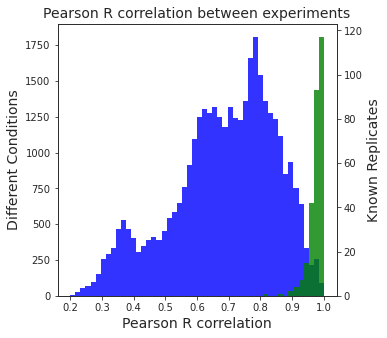

In [16]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

Remove samples without any high-correlation replicates

In [17]:
dissimilar = []
for idx, grp in DF_metadata_passed_step4.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)

# Save this information in both the original metadata dataframe and the new metadata dataframe
DF_metadata_all['passed_replicate_correlations'] = ~DF_metadata_all.index.isin(dissimilar)
DF_metadata_passed_step4['passed_replicate_correlations'] = ~DF_metadata_passed_step4.index.isin(dissimilar)

In [18]:
DF_metadata_final = DF_metadata_passed_step4[DF_metadata_passed_step4['passed_replicate_correlations']]
print('# Samples that passed replicate correlations:',len(DF_metadata_final))

# Samples that passed replicate correlations: 265


## Check that reference conditions still exist
If a reference condition was removed due to poor replicate correlations, a new reference condition needs to be defined.

Again, any samples that fail these checks will be printed below.

In [19]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Ensure the reference condition is still in the project
    if ref_cond not in group.condition.tolist():
        print('Reference condition missing from:', name)
    
    # Check that each project has at least two conditions (a reference and at least one test condition)
    if len(group.condition.unique()) <= 1:
        print('Only one condition in:', name)

If necessary, choose a new condition for failed projects and re-run notebook.

## Normalize dataset to reference conditions

In [20]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [21]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Get reference condition sample ids
    ref_samples = group[group.condition == ref_cond].index
    
    # Get reference condition expression
    ref_expr = DF_log_tpm_final[ref_samples].mean(axis=1)
    
    # Subtract reference expression from project
    project_exprs.append(DF_log_tpm_final[group.index].sub(ref_expr,axis=0))

DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

## Save final datasets

In [23]:
logTPM_qc_file = path.join('..','data','processed_data','log_tpm.csv')
logTPM_norm_file = path.join('..','data','processed_data','log_tpm_norm.csv')
final_metadata_file = path.join('..','data','processed_data','metadata.tsv')
final_metadata_all_file = path.join('..','data','interim','metadata_qc_part2_all.tsv')

DF_log_tpm_final.to_csv(logTPM_qc_file)
DF_log_tpm_norm.to_csv(logTPM_norm_file)
DF_metadata_final.to_csv(final_metadata_file, sep='\t')
DF_metadata_all.to_csv(final_metadata_all_file, sep='\t')